# Practical 3: Artificial Neural Network

This is the first task of Practical 3. You will build a neural network to classify the handwritten digits from the MNIST dataset (http://yann.lecun.com/exdb/mnist/). 
You will build the classifier from scartch. 

We will mark your code based on the accuracy of your model. You should get **at least 97%** accuracy on this dataset. Don't forget to save and check in your model. 

## Import the libraries

In [2]:
# !pip install keras

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [4]:
tf.__version__

'2.4.0'

In [5]:
tf.keras.__version__

'2.4.0'

## Prepare the dataset

In this block, you will prepare the data for the training, such as normalisation. 

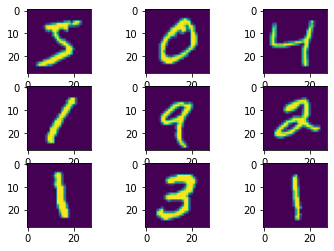

(60000, 28, 28)


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
from keras.datasets import mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train_full[i])
    
plt.show()

X_train_full, X_test = X_train_full / 255.0, X_test / 255.0

print(X_train_full.shape)

# Add a channels dimension
X_train_full = X_train_full[..., tf.newaxis].astype("float32")
X_test = X_test[..., tf.newaxis].astype("float32")
y_train_full

## Build and train the model

Build and train your model. 

In [7]:
from tensorflow.keras import layers

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# TODO: Build your model

# Create an instance of the model
# model = keras.Sequential(
#     [
#         keras.Input(shape=input_shape),
#         layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
#         layers.MaxPooling2D(pool_size=(2, 2)),
#         layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
#         layers.MaxPooling2D(pool_size=(2, 2)),
#         layers.Flatten(),
#         layers.Dropout(0.5),
#         layers.Dense(num_classes, activation="softmax"),
#     ]
# )

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(256, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(num_classes,activation="softmax"),
    ]
)


In [8]:
# show the structure of your model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [9]:
batch_size = 128
epochs = 15


lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1,
    decay_rate=0.9)

opt = keras.optimizers.Adam(learning_rate=0.001)
# lr_metric = get_lr_metric(opt)
callback = tf.keras.callbacks.LearningRateScheduler(lr_schedule,verbose=1)

model.compile(loss="SparseCategoricalCrossentropy", optimizer=opt, metrics=["accuracy"])

history=model.fit(X_train_full, y_train_full, batch_size=batch_size, epochs=epochs,callbacks=[callback],validation_split=0.15)

Epoch 1/15

Epoch 00001: LearningRateScheduler reducing learning rate to tf.Tensor(0.001, shape=(), dtype=float32).
399/399 [==============================] - 1s 3ms/step - loss: 0.5809 - accuracy: 0.8258 - val_loss: 0.1302 - val_accuracy: 0.9632
Epoch 2/15

Epoch 00002: LearningRateScheduler reducing learning rate to tf.Tensor(0.00090000004, shape=(), dtype=float32).
399/399 [==============================] - 1s 2ms/step - loss: 0.1220 - accuracy: 0.9636 - val_loss: 0.0967 - val_accuracy: 0.9712
Epoch 3/15

Epoch 00003: LearningRateScheduler reducing learning rate to tf.Tensor(0.00081, shape=(), dtype=float32).
399/399 [==============================] - 1s 2ms/step - loss: 0.0728 - accuracy: 0.9781 - val_loss: 0.0853 - val_accuracy: 0.9748
Epoch 4/15

Epoch 00004: LearningRateScheduler reducing learning rate to tf.Tensor(0.00072899996, shape=(), dtype=float32).
399/399 [==============================] - 1s 2ms/step - loss: 0.0532 - accuracy: 0.9834 - val_loss: 0.0807 - val_accuracy: 0

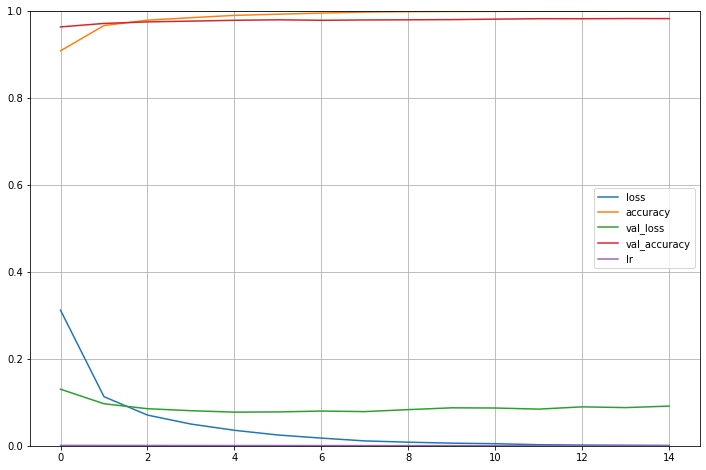

In [10]:
# Assume you have stored the training history in the variable "history"
# Show the learning curves
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

## Save the model

In [15]:
# Save the weights
model.save("Checkpoints/mnist.h5")

## Load the model and evaluate it on the test data

In [16]:
model = keras.models.load_model("Checkpoints/mnist.h5")
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 622us/step - loss: 0.0812 - accuracy: 0.9816


[0.08122862130403519, 0.9815999865531921]

## Short report

Please write briefly how you build and train the model. Please include the decisions you made, such as why you use x number layers, and the difficulties you met.